<font color="red">

Final performances for reference:

</font>

,Model,Macro F1,Negative F1,Neutral F1,Positive F1
0,MLP,0.682961,0.637168,0.798507,0.613208
1,RNN,0.689099,0.694444,0.782609,0.590244
2,LSTM,0.721451,0.741463,0.797590,0.625298
3,GRU,0.752987,0.735294,0.832947,0.690722
4,BERT,0.794777,0.797980,0.844933,0.741419
5,GPT,0.803895,0.757282,0.882286,0.772118


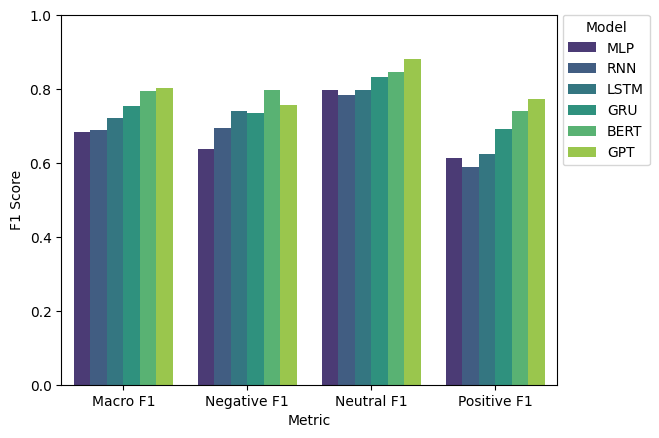

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

def compute_f1_scores(cm):
    cm = np.array(cm)
    
    y_true = []
    y_pred = []
    
    for true_class in range(cm.shape[0]):
        for pred_class in range(cm.shape[1]):
            count = cm[true_class, pred_class]
            y_true += [true_class] * count
            y_pred += [pred_class] * count
    
    # Macro F1 score
    macro_f1 = f1_score(y_true, y_pred, average='macro')

    # Per-class F1 scores
    f1_per_class = f1_score(y_true, y_pred, average=None)
    
    return {
        'Macro F1': macro_f1,
        'Negative F1': f1_per_class[0],
        'Neutral F1': f1_per_class[1],
        'Positive F1': f1_per_class[2]
    }

# Copied from the confusion matrices from the outputs folder
mlp_cm = [[72,8,11], [32,321,79], [31,43,130]]
rnn_cm = [[75,10,6], [29,324,79], [21,62,121]]
lstm_cm = [[76,9,6], [23,331,78], [15,58,131]]
gru_cm = [[75,13,3], [26,359,47], [12,58,134]]
bert_cm = [[79,8,4], [19,346,67], [9,33,162]]
gpt_cm = [[78,11,2], [23,386,23], [14,46,144]]

models = {
    'MLP': mlp_cm,
    'RNN': rnn_cm,
    'LSTM': lstm_cm,
    'GRU': gru_cm,
    'BERT': bert_cm,
    'GPT': gpt_cm
}

results = []

for model, cm in models.items():
    f1_scores = compute_f1_scores(cm)
    f1_scores['Model'] = model
    results.append(f1_scores)

df = pd.DataFrame(results)
df = df[['Model', 'Macro F1', 'Negative F1', 'Neutral F1', 'Positive F1']]

display(df)

# Reformat df for plotting
df_long = df.melt(
    id_vars='Model', 
    value_vars=['Macro F1', 'Negative F1', 'Neutral F1', 'Positive F1'],
    var_name='Metric',
    value_name='F1 Score'
)

sns.barplot(df_long, x='Metric', y='F1 Score', hue='Model', palette='viridis')

plt.legend(title='Model', bbox_to_anchor=(1.2, 1.02))
plt.ylim(0,1)
plt.show()

## 1. Training Dynamics
*Focus on your MLP and LSTM implementations*

- Did your models show signs of **overfitting** or **underfitting**? What architectural or training changes could address this?

<font color="red">

MLP Learning Curves:

<img src="../../outputs/mlp_f1_learning_curves.png" width="800"/>

LSTM Learning Curves:

<img src="../../outputs/lstm_f1_learning_curves.png" width="800"/>

</font>

<font color="red">

For my MLP implementation, there are signs of very mild overfitting. This is mainly based on how the learning curves (loss, F1, and accuracy) for the training and validation sets slow down and plateau in later epochs, ultimately intersecting and leaving the validation curves performing slightly worse than the training curves (i.e. val loss curve starts being slightly higher than the train loss, and val F1/accuracy curves start being slightly lower than the train F1/accuracy curves). Additionally, the final train F1 for epoch 30 (0.7183) is slightly higher than the test F1 (0.6830), further suggesting mild overfitting. 

For my LSTM implementation, there are signs of some overfitting. This is based on how each metric's learning curve plots shows the validation curve lagging behind the train curve starting around epochs 15-20, with the loss curves showing the most drastic difference (ending with train loss of 0.4772 but val loss of 0.6808). Additionally, for each metric, at the last epoch, the train curve looks like it could continue improving in performance (i.e. train loss would continue decreasing, train F1/accuracy continuing to increase), whereas the val curves show signs of plateauing. Indeed, the final train F1 for epoch 30 (0.7875) is higher than the test F1 (0.7215). Altogether, my LSTM model shows signs of overfitting, to an extent greater than the MLP model did.

Changes that could address both models' overfitting include early stopping when the validation loss stops improving, stronger regularization (e.g. strengthening the weight decay in the optimizer, increasing dropout), and reducing model capacity (parameters) by reducing the number and/or the size of hidden layers. These suggestions would be more applicable for the LSTM model that shows more signs of overfitting.

</font>

- How did using **class weights** affect training stability and final performance?

<font color="red">

Mechanically, class weights are used to address class imbalance in the dataset by scaling the loss contribution of samples based on their true class. More specifically, the loss contribution of samples from minority classes are scaled up relative to samples from majority classes, meaning that misclassifications of samples of less represented classes are penalized more heavily than samples of more represented classes. 

Class weights can negatively affect training stability if the weighting is too strong, leading to larger gradient updates (i.e. overcorrections) for errors in classifying minority samples. However, class weights still generally improve final performance as it prevents models from making predictions biased to the majority class (e.g. without class weights, always guessing the majority class would technically give decent performance as that majority would be classified correctly, but such a model would be extremely biased and not particularly useful). For the dataset used in this assignment, class weights to handle class imbalance would be generally beneficial to final performances as the dataset has a significantly imbalanced class distribution.

</font>

## 2. Model Performance and Error Analysis
*Focus on your MLP and LSTM implementations*

- Which of your two models **generalized better** to the test set? Provide evidence from your metrics.

<font color="red">

Note that the gap between the final train F1 and test F1 scores is larger for the LSTM model (0.7875 and 0.7215 respectively, giving a gap of about 0.06) than the MLP model (0.7183 and 0.6830 respectively, giving a gap of about 0.03). This is likely from how, as mentioned before, the LSTM model shows more signs of potential overfitting than the MLP model. However, the LSTM model ultimately still has a higher test F1 score than the MLP model (0.7215 > 0.6830). This means that the LSTM model performs better on the same test set given the same training set as the MLP model. Since generalizability is defined as how well a model performs on a test set of data that the model has not seen in training, the higher test F1 score for the LSTM model can be interpreted as it being better at generalizing than the MLP model. 

This is despite the fact that the LSTM model shows greater signs of overfitting, which should be irrelevant in terms of gauging its generalizability as overfitting is essentially how much the model is merely memorizing the training set. This means overfitting is connected to but still ultimately distinct from generalizability.

</font>

- Which **sentiment class** was most frequently misclassified? Propose reasons for this pattern.

<font color="red">

Recall essentially measures how many actual positives were correctly classified (defined as $\frac{TP}{TP+FN}$), so it is an appropriate measure of the rate of misclassification. Thus, the positive (2) sentiment class was most frequently misclassified as its recall is the lowest for both the MLP (0.6373) and LSTM (0.6422) models. 

A potential reason for this pattern is that positive sentiments in financial language could be mild and thus harder to distinguish from a neutral sentiment. Furthermore, in contrast, negative sentiments could have stronger language more often. This is supported by the confusion matrices for the MLP and LSTM models as both models show that the bulk of misclassifications of positives were actual positives that were predicted as neutral, and most of the misclassifications of neutrals were actual neutrals that were predicted as positive. Additionally, the recall for the negative class is the best of the three classes for both models. In other words, both models seem to struggle the most with differentiating neutral from positive sentiments, while negative sentiments appear relatively easy to classify. 

This struggle to differentiate neutral sentiments from positive sentiments is reflected more in the models' recalls for the positive sentiment than the neutral sentiment because the neutral class still has a much greater proportion of samples overall that were correctly predicted as neutral. 

</font>

## 3. Cross-Model Comparison
*Compare all six models: MLP, RNN, LSTM, GRU, BERT, GPT*

- How did **mean-pooled FastText embeddings** limit the MLP compared to sequence-based models?

<font color="red">

The biggest limitation of using mean-pooled FastText embeddings compared to sequence-based models is that mean-pooling removes sequential structure such as word order. Sentences with similar tokens but in different orders would have nearly identical sentence embeddings under the mean-pooled approach, even if those different word orders would mean those sentences have different sentiments since sentiments depend on more than merely the words that are used. Similarly, mean-pooled FastText embeddings would also be unable to capture context as well as sequence-based models as context depends on how words are strung together in order. Thus, there are significant aspects of sentence meanings that the MLP model would not be able to capture as well as sequence-based models.

</font>

- What advantage did the LSTM’s **sequential processing** provide over the MLP?

<font color="red">

Although the LSTM model also uses the same FastText embeddings as the MLP model, one advantage provided by its sequential processing is that it can preserve word order due to how it maintains representations of sentences in hidden states that get updated with each consecutive token in the sentence. This process allows the LSTM model to also handle long-range dependencies across tokens, which is important when earlier tokens affect the meanings of later tokens, such as in sentences with negation ("note") or contrast ("but"). Thus, through the sequential processing, the LSTM model has the advantage of capturing context and sequential structure better than the MLP model since the MLP model essentially disregards word order.

</font>

- Did **fine-tuned LLMs** (BERT/GPT) outperform classical baselines? Explain the performance gap in terms of pretraining and contextual representations.

<font color="red">

Yes, the fine-tuned LLMs outperformed the classical approaches given by how the top two performing models out of the six total were the GPT and BERT models (test macro F1 scores of 0.804 and 0.795 respectively, compared to the next best test macro F1 score of 0.753 for the GRU model). 

For all models, there was some pretraining, but the specifics differed. The MLP and LSTM models used static FastText embeddings that were pretrained on Wikipedia and news articles. This comes with the limitation of each word having fixed embeddings, making it harder for the models to understand context and sentence-level meanings beyond mere lexical knowledge. The issue of poor contextual representations is especially relevant for the MLP model, which lacks the sequential processing in the LSTM model that allows the LSTM model to gain a bit of context in its sentence representations. 

In contrast, the RNN and GRU models used a pretrained sentence encoder (MiniLM), which is transformer-based (and thus has layers of self-attention), allowing for better capture of context as a word's embedding would depend on surrounding tokens. However, like the MLP and LSTM models, the RNN and GRU approaches still only use fixed embeddings and lack fine-tuning, meaning that the representations the downstream classifiers train on are fixed.

Compared to the other four models, the BERT and GPT models are pretrained on massive corpuses, and they also involve fine-tuning. This means that not only do they have strong base embedding models, nut they are also capable of updating ("fine-tuning") the embeddings used for the classifier according to the classification task itself. This allows them to better capture contexts in ways that are more relevant for sentiment classification of finance-related sentences. In other words, the fine-tuned LLMs have the most robust pretrained models with dynamic contextual representations that are adjusted for the specific sentiment classification task at hand. Given that, it is not surprising that the BERT and GPT models perform significantly better than the other classical models.

</font>

- **Rank all six models** by test performance. What architectural or representational factors explain the ranking?

<font color="red">

From best to worst test macro F1 scores, the models are: GPT (0.804) > BERT (0.795) > GRU (0.753) > LSTM (0.721) > RNN (0.689) > MLP (0.683).

Architectural and/or representational factors explaining the ranking include: 

- scale of the pretrained embeddings (i.e. how big the pretraining corpuses were, how much knowledge the model had to provide the classifier)
  - BERT and GPT had the largest corpuses, which is part of why they perform better than the other models.
- ability to capture long-range dependencies
  - MLP has no sequential processing at all, which leads to it being the worst performer. The RNN model has sequential processing, but it is shallow (only 1 recurrent layer) and lacks gating (and thus has worse long-term memory). The LSTM and GRU models have sequential processing, but also gated memory, making it better with long-range dependencies. The BERT and GPT models have global self-attention, which is even better than sequential processing at things like long-range dependencies.
- presence of fine-tuning (as opposed to fixed representations)
  - MLP, LSTM, RNN, and GRU models all involve some form of fixed embeddings (MLP and LSTM used static FastText embeddings, RNN and GRU used fixed MiniLM sentence embeddings). BERT and GPT have fine-tuning, which contributes to their better performance.
- architectural depth (deeper roughly correlates with performance)
  - The MLP and RNN architectures are relatively shallow. LSTM and GRU models have gating which adds complexity but still are shallow in terms of how many layers are stacked. BERT and GPT contain multiple stacked transformer layers.

</font>

## AI Use Disclosure (Required)

If you used any AI-enabled tools (e.g., ChatGPT, GitHub Copilot, Claude, or other LLM assistants) while working on this assignment, you must disclose that use here. The goal is transparency-not punishment.

In your disclosure, briefly include:
- **Tool(s) used:** (name + version if known)
- **How you used them:** (e.g., concept explanation, debugging, drafting code, rewriting text)
- **What you verified yourself:** (e.g., reran the notebook, checked outputs/plots, checked shapes, read documentation)
- **What you did *not* use AI for (if applicable):** (optional)

You are responsible for the correctness of your submission, even if AI suggested code or explanations.

<font color="red">

I used ChatGPT for concept explanation (e.g. fine-tuning, training stability, self-attention, gating) and debugging (figuring out why my LSTM model was not learning due to issues with padding). I verified things by doing my own Google searches and finding non-AI sources to confirm my understanding. I also referenced the lecture slides to understand what to expect in terms of how the models rank in terms of performances.

</font>